In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/content/Students_Performance.csv')
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


**a)**

In [3]:
df=pd.DataFrame(data)

In [4]:
print(df['gender'].value_counts())

female    518
male      482
Name: gender, dtype: int64


**b) visualising students 'parental level of education'**

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

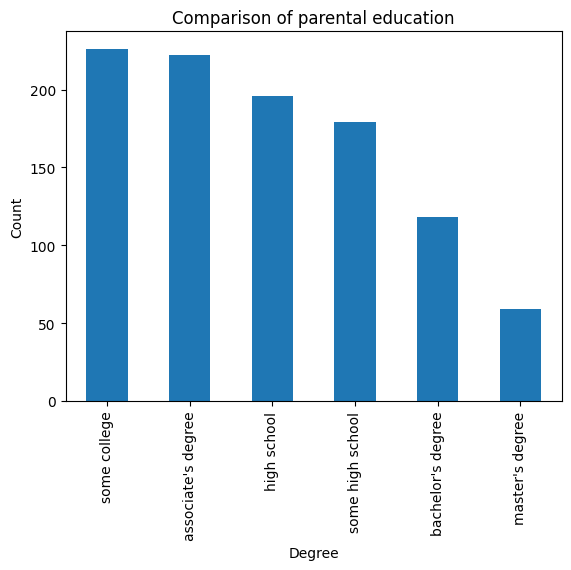

In [6]:
data['parental level of education'].value_counts
data['parental level of education'].value_counts(dropna=False).plot.bar()
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Comparison of parental education')
plt.show()

 Filtering out parents' education level

In [7]:
data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

[Text(0, 0, 'some high school'),
 Text(1, 0, 'high school'),
 Text(2, 0, 'some college'),
 Text(3, 0, "associate's degree"),
 Text(4, 0, "bachelor's degree"),
 Text(5, 0, "master's degree")]

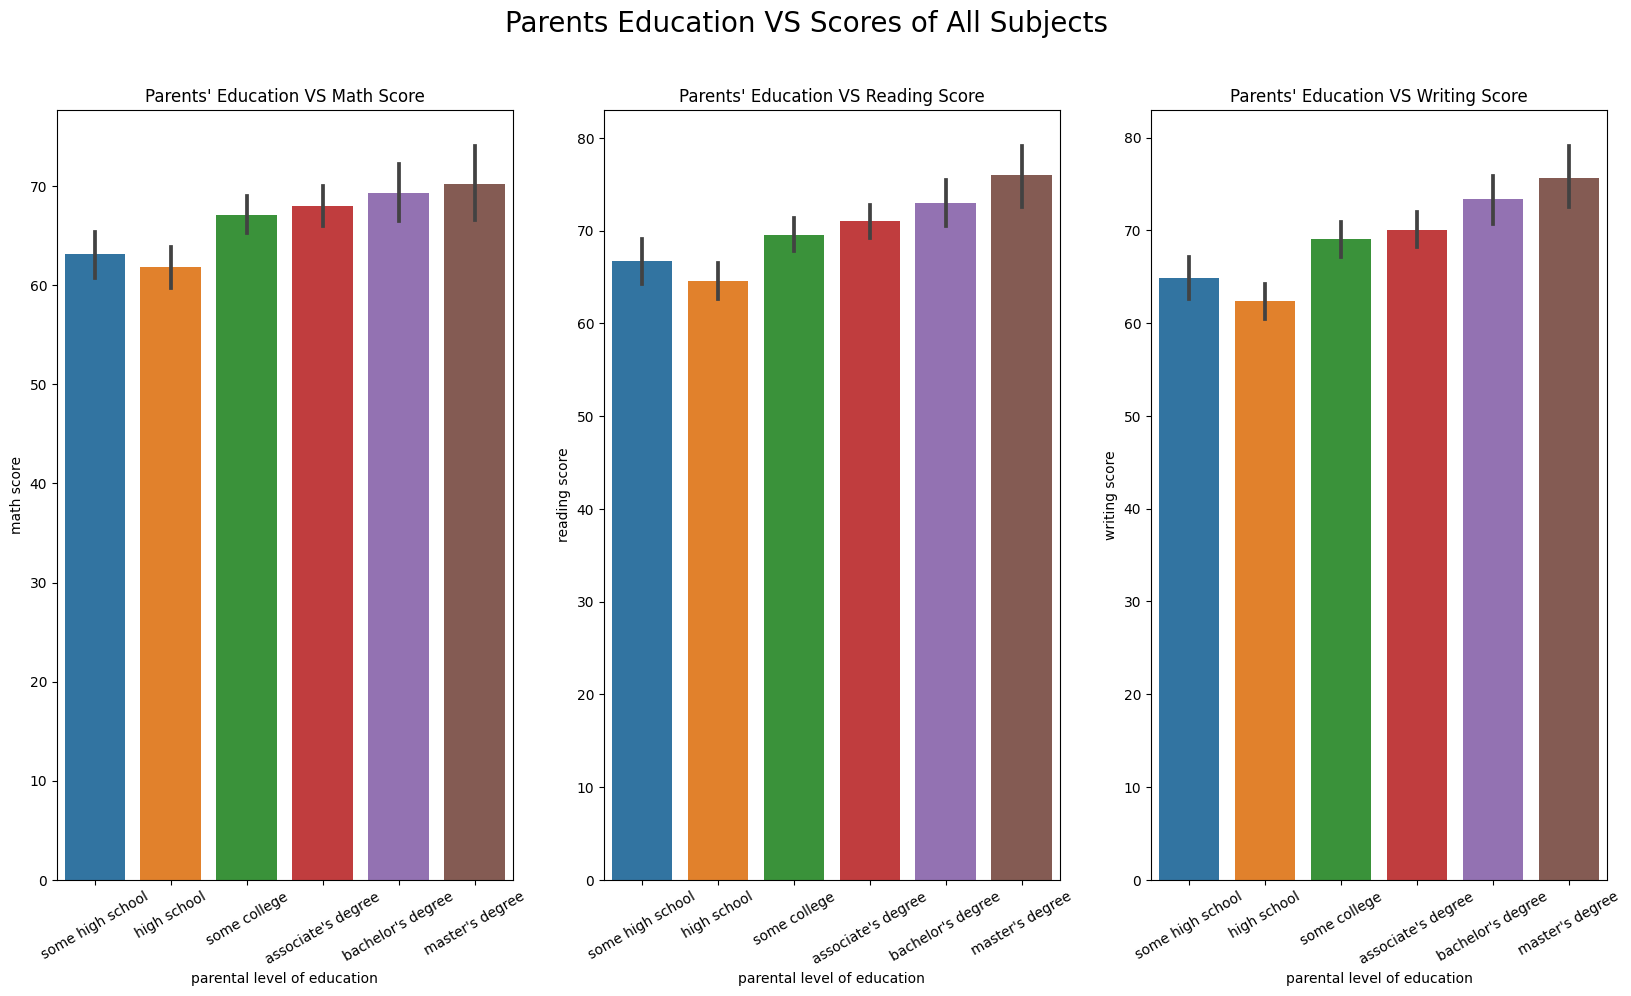

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
fig.suptitle('Parents Education VS Scores of All Subjects', fontsize=20)

sns.barplot(data=data,x='parental level of education', y='math score', ax=ax1)
ax1.title.set_text('Parents\' Education VS Math Score')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30)

sns.barplot(data=data,x='parental level of education', y='reading score', ax=ax2)
ax2.title.set_text('Parents\' Education VS Reading Score')
ax2.set_xticklabels(ax1.get_xticklabels(), rotation=30)

sns.barplot(data=data,x='parental level of education', y='writing score', ax=ax3)
ax3.title.set_text('Parents\' Education VS Writing Score')
ax3.set_xticklabels(ax1.get_xticklabels(), rotation=30)



**c)**

In [12]:
data.mean()

<ipython-input-12-abc01cf6c622>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.mean()


math score       66.001
reading score    69.195
writing score    68.119
dtype: float64

Creating a new column for average of the three scores

In [13]:
data['score average'] = (data[['math score','reading score','writing score']]).mean(axis=1)
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score average
0,female,group C,some high school,free/reduced,none,0,17,10,9.000000
1,female,group B,high school,free/reduced,none,8,24,23,18.333333
2,female,group B,some high school,free/reduced,none,18,32,28,26.000000
3,female,group B,some college,standard,none,11,38,32,27.000000
4,female,group C,some college,free/reduced,none,22,39,33,31.333333


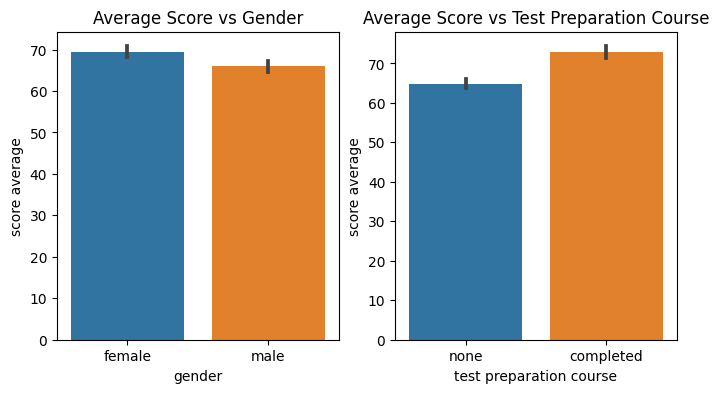

In [15]:
fig, (ax4, ax5) = plt.subplots(1, 2, figsize=(8, 4))
sns.barplot(y=data['score average'], x=data['gender'], ax=ax4)
ax4.title.set_text('Average Score vs Gender')
sns.barplot(y=data['score average'], x=data['test preparation course'], ax=ax5)
ax5.title.set_text('Average Score vs Test Preparation Course')

That is,average score against gender shows : female students performance was good in all test.
Average score against test preparation course shows that students who have completed the course performed well in the test.

**d)**

In [16]:
data['Scoring Variation'] = data[['math score','writing score','reading score']].std(axis=1)
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score average,Scoring Variation
0,female,group C,some high school,free/reduced,none,0,17,10,9.000000,8.544004
1,female,group B,high school,free/reduced,none,8,24,23,18.333333,8.962886
2,female,group B,some high school,free/reduced,none,18,32,28,26.000000,7.211103
3,female,group B,some college,standard,none,11,38,32,27.000000,14.177447
4,female,group C,some college,free/reduced,none,22,39,33,31.333333,8.621678


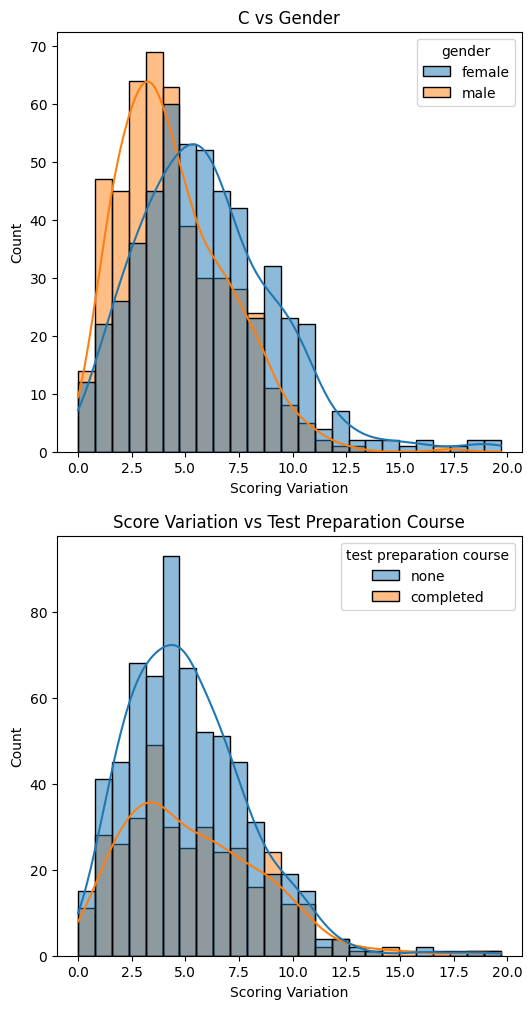

In [17]:
fig, (ax6, ax7) = plt.subplots(2, 1, figsize=(6,12))

sns.histplot(x=data['Scoring Variation'],hue=data['gender'], kde=True, ax=ax6)
ax6.title.set_text('C vs Gender')

sns.histplot(x=data['Scoring Variation'],hue=data['test preparation course'], kde=True, ax=ax7)
ax7.title.set_text('Score Variation vs Test Preparation Course')

**e)**

In [18]:
cut_off_score = np.percentile(data['math score'].values,75)
eligible_students = data[data['math score'] >= cut_off_score]
eligible_students.sort_values('math score',ascending=False)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score average,Scoring Variation
999,male,group E,bachelor's degree,standard,completed,100,100,100,100.000000,0.000000
998,male,group E,associate's degree,free/reduced,completed,100,100,93,97.666667,4.041452
997,male,group D,some college,standard,completed,100,97,99,98.666667,1.527525
996,male,group A,some college,standard,completed,100,96,86,94.000000,7.211103
517,female,group E,associate's degree,standard,none,100,100,100,100.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
854,male,group D,some high school,standard,completed,77,68,69,71.333333,4.932883
855,male,group E,associate's degree,free/reduced,completed,77,69,68,71.333333,4.932883
856,male,group E,some high school,standard,completed,77,76,77,76.666667,0.577350
415,female,group B,master's degree,free/reduced,completed,77,97,94,89.333333,10.785793


**Case Study on testing of hypothesis**

In [19]:
sales_data = pd.read_csv('/content/Sales_add.csv')
sales_data

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402
5,Month-6,Region - A,Manager - B,137163,256948
6,Month-7,Region - C,Manager - C,130625,222106
7,Month-8,Region - A,Manager - A,131140,230637
8,Month-9,Region - B,Manager - C,171259,226261
9,Month-10,Region - C,Manager - B,141956,193735


In [20]:
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

**a)**

Here, we are using t test
H0: Digital marketing has no effect on sales.
H1: Digital marketing has effect on sales.

In [22]:
t,pv = ttest_ind(sales_data['Sales_before_digital_add(in $)'],sales_data['Sales_After_digital_add(in $)'])

In [23]:
if pv<0.05:
    print('Reject Null Hypothesis')
else:
    print('Accept Null Hypothesis')

Reject Null Hypothesis


so we can conclude that  digital marketing has effect on sales,that is there is an increament

**b)**

In [24]:
data1 = pd.crosstab(sales_data['Region'],sales_data['Manager'])

In [26]:
chi, p_value,_,_ = chi2_contingency(data1)

In [27]:
if p_value<0.05:
    print("Rejecting Independence")
else:
    print("Accepting Independence")

Accepting Independence


so we can conclude that 'region' and 'manager' are independent of each other
